In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('data/data.zip')

In [20]:
def convert(row):
    if row['acct_type'] == 'fraudster_event':
        val=True
    elif row['acct_type'] == 'fraudster':
        val=True
    elif row['acct_type'] == 'fraudster_att':
        val=True
    else:
        val=False
    return val
df['Fraud'] = df.apply(convert, axis=1)

In [21]:
df

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,fraudster_event,1361689200,667,0,US,USD,0.0,<p>Celebrates this wonderful holiday with the ...,yahoo.com,1360297993,...,0,1360297993,1,6100 North Charles Street,US,39.373780,-76.629921,Elkridge Club,MD,True
14333,premium,1365566400,5812,5,US,USD,1.0,"<table style=""width: 600px;"" border=""0"" cellsp...",me.com,1360367042,...,1374,1241625346,4,1775 E Mission Bay Dr,US,32.778906,-117.209791,Hilton San Diego Resort and Spa (Hilton Missio...,CA,False
14334,premium,1368781200,557,13,,USD,0.0,<p>What a way to start off your Mother's Day l...,yahoo.com,1360600330,...,84,1353386971,4,5991 Bullard Road,US,30.041819,-89.957130,Fleur De Lis Ballroom NUMBER 2,LA,False
14335,tos_warn,1361361600,10873,8,US,USD,0.0,"<p style=""font-family: 'Helvetica Neue', Helve...",velvetlist.com,1360376285,...,812,1290204991,3,2297 Cedar Ave,US,40.862283,-73.911363,Salsa con fuego,NY,False


In [22]:
counts = df['Fraud'].value_counts()
counts

False    13044
True      1293
Name: Fraud, dtype: int64

In [23]:
acct_types = df['acct_type'].value_counts()
acct_types

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

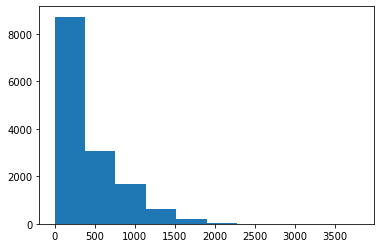

In [33]:
plt.hist(df['user_age'])
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [32]:
df.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,1.433700e+04,14337.000000,14337.000000,14321.000000,1.433700e+04,1.433700e+04,1.423800e+04,1.433700e+04,14337.000000,14337.000000,...,14278.000000,14278.000000,14182.000000,14337.000000,14337.000000,14337.000000,1.433700e+04,14337.000000,13261.000000,13261.000000
mean,1.350933e+09,3672.521936,6.176676,0.439564,1.345825e+09,1.350501e+09,1.340854e+09,1.350205e+09,0.127433,2430.231492,...,7.974436,4.306976,46.869694,50.576759,0.844179,374.226547,1.313492e+09,2.711097,35.221736,-59.490368
std,2.401300e+07,5758.113003,3.860333,0.591487,2.404107e+07,2.401299e+07,8.750386e+07,2.398787e+07,0.333468,9142.308260,...,11.761241,6.011520,54.825253,59.678090,0.362698,418.593616,4.152174e+07,1.606726,20.207588,66.569034
min,1.171256e+09,0.000000,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,...,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-45.045208,-159.390183
25%,1.334221e+09,750.000000,5.000000,0.000000,1.329754e+09,1.333789e+09,1.329499e+09,1.333406e+09,0.000000,116.410000,...,0.000000,0.000000,16.000000,17.000000,1.000000,13.000000,1.286824e+09,1.000000,33.959338,-96.957828
50%,1.355805e+09,1990.000000,6.000000,0.000000,1.351043e+09,1.355373e+09,1.351099e+09,1.355000e+09,0.000000,431.930000,...,0.000000,0.000000,32.000000,35.000000,1.000000,242.000000,1.316636e+09,3.000000,39.974104,-79.425579
75%,1.370646e+09,4280.000000,8.000000,1.000000,1.365346e+09,1.370214e+09,1.365478e+09,1.370048e+09,0.000000,1547.260000,...,14.000000,11.000000,59.000000,63.000000,1.000000,603.000000,1.346790e+09,3.000000,44.857040,-3.187449
max,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,306293.930000,...,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492


In [35]:
user_type_counts = df['user_type'].value_counts()
user_type_counts

3      7520
1      3738
4      3017
5        59
103       2
2         1
Name: user_type, dtype: int64

In [39]:
country_types = df['venue_country'].value_counts()
country_types

US    8336
GB    1838
CA    1134
       876
AU     683
      ... 
MC       1
KH       1
SK       1
VI       1
HK       1
Name: venue_country, Length: 69, dtype: int64

In [42]:
state_types = df['venue_state'].value_counts()
state_types

                  2625
CA                1377
NY                 762
TX                 487
FL                 406
                  ... 
Middlesex            1
Tokyo                1
Warszawa             1
Wirral               1
West Yorkshire       1
Name: venue_state, Length: 442, dtype: int64

In [46]:
df.columns

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state',
       'Fraud'],
      dtype='object')

In [48]:
# df.select_dtypes(include='int64').fillna(0)
# df.select_dtypes(include='float64').fillna(0)
# df.select_dtypes(include='object').fillna("NULL")

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,fraudster_event,1361689200,667,0,US,USD,0.0,<p>Celebrates this wonderful holiday with the ...,yahoo.com,1360297993,...,0,1360297993,1,6100 North Charles Street,US,39.373780,-76.629921,Elkridge Club,MD,True
14333,premium,1365566400,5812,5,US,USD,1.0,"<table style=""width: 600px;"" border=""0"" cellsp...",me.com,1360367042,...,1374,1241625346,4,1775 E Mission Bay Dr,US,32.778906,-117.209791,Hilton San Diego Resort and Spa (Hilton Missio...,CA,False
14334,premium,1368781200,557,13,,USD,0.0,<p>What a way to start off your Mother's Day l...,yahoo.com,1360600330,...,84,1353386971,4,5991 Bullard Road,US,30.041819,-89.957130,Fleur De Lis Ballroom NUMBER 2,LA,False
14335,tos_warn,1361361600,10873,8,US,USD,0.0,"<p style=""font-family: 'Helvetica Neue', Helve...",velvetlist.com,1360376285,...,812,1290204991,3,2297 Cedar Ave,US,40.862283,-73.911363,Salsa con fuego,NY,False
